Graphs

Subsets of graphs include: 
- Trees
- linked lists

Graphs contain vertices and edges. 

graphs do not require edges but generally have edges. 

edges can be uni and bi directional. 

vertex is more commonly referred to as a node

graphs that consist of entirely bidirectional connections and undirected graphs. 

graphs that contain infinite cycles are refered to as cyclic graphs. 

there are several ways to store a graph, typically they are stored as edge lists

edge lists consist of a list of edges: [[1,2],[2,3]], where the 0th element is the 'from' and the 1st element is the 'to'

adjacency matrices are typically more useful for representations of graphs.

n*n matrix to represent all connections, this is useful visually but computationally expensive. 
from is shown on the first axis of the matrix and to is the second axis of the matrix

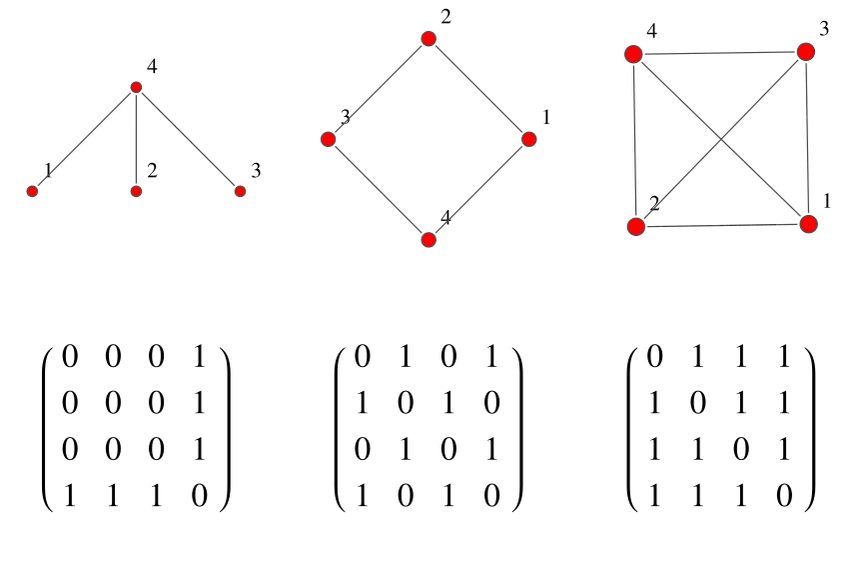

adjacency lists are the most useful as a compromise between the two structures above

using a dictionary with keys for the vertices and arrays for the neighbors

final storage method is using a node class similar to those seen in trees and linked lists

Depth First Search


this reaches down a single path until it no longer can and then switches to a new route. 

traversals require a seen set to avoid repeated processing on traversal. 

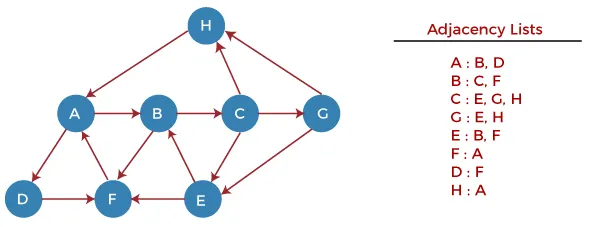

recursive dfs uses a call stack

loops can be used in an iterative dfs along with a stack

Breath First Search

This looks at all of the neighbors of the node and then moves to the nieghbors of the nieghbors

this uses a queue and also requires a seen set

Time and Space of graphs: 

if using an adjacency list: 
- Time: O(V+E)
- Space: O(V+E) 

Also you are storing a seen set

This is the same for BFS and DFS

What are trees in the context of graphs? 

Trees are connected acyclic graphs. 

connected: you can get anywhere from one node to another.

acyclic: does not contain any cycles. 

Trees: 
if the number of nodes is N, then number of connections will be N - 1. 

Always N - 1 connections

In [1]:
# given an array of edges: 
n = 8 
A = [[0,1],[1,2],[0,3],[3,4],[3,6],[3,7],[4,2],[4,5],[5,2]]

Converting edges to adjacency matrix

In [4]:
M = [[0]*n for _ in range(n)]
for u,v in A: 
    M[u][v] = 1 

    # if undirected uncomment
    # M[v][u] =1 


In [5]:
M

[[0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

Converting edges to adjaceny lists

In [11]:
from collections import defaultdict

D = defaultdict(list)

for u,v in A: 
    D[u].append(v)

    # if undirected uncomment
    # D[v].append(u)

In [12]:
D

defaultdict(list, {0: [1, 3], 1: [2], 3: [4, 6, 7], 4: [2, 5], 5: [2]})

DFS with Recursion

In [14]:
seen = set()


def dfsRecursive(node): 
    print(node) #process the node
    for neighbor in D[node]: 
        if neighbor not in seen: 
            seen.add(neighbor)
            dfsRecursive(neighbor)
source = 0
seen.add(source)
dfsRecursive(source)

0
1
2
3
4
5
6
7


Iterative DFS 

In [16]:
seen = set()
stack = [source]

def dfsRecursive(node): 
    while stack: 
        node = stack.pop()
        print(node) #process the node
        for neighbor in D[node]: 
            if neighbor not in seen: 
                seen.add(neighbor)
                stack.append(neighbor)
source = 0
seen.add(source)
dfsRecursive(source)

0
3
7
6
4
5
2
1


BFS with Queue

In [20]:
from collections import deque

seen = set()
q = deque()
q.append(source)

def bfsQueue(node): 
    while q: 
        node = q.popleft()
        print(node) #process the node
        for neighbor in D[node]: 
            if neighbor not in seen: 
                seen.add(neighbor)
                q.append(neighbor)
source = 0
seen.add(source)
bfsQueue(source)

0
1
3
2
4
6
7
5


Storing Graphs in memory as a class

In [23]:
class Node:
    def __init__(self,value): 
        self.value = value
        self.neighbors = [] 

    def __str__(self): 
        return f'Node({self.value})'
    
    def display(self): 
        connections = [node.value for node in self.neighbors]
        return f'{self.value} is connected to: {connections}'
    
A = Node('A')
B = Node('B')
C = Node('C')
D = Node('D')

A.neighbors.append(B)
B.neighbors.append(A)

C.neighbors.append(D)
D.neighbors.append(C)

In [24]:
C.display()

"C is connected to: ['D']"

Topological Sort

Other Algorithms: 
- krushal
- prim 
- dijkstra's
